In [2]:
# 1. MNIST 패션 데이터 DNN으로 구현

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 images
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Fashion dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                  train=True,
                                                  transform=transforms.ToTensor(),
                                                  download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                                 train=False,
                                                 transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Deep neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses = []
val_losses = []  # 간단한 검증 로스를 원한다면 작은 검증 루프를 추가할 수 있음

total_step = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

    # 에폭 평균 손실 기록
    epoch_loss = running_loss / total_step
    train_losses.append(epoch_loss)

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.5296
Epoch [1/5], Step [200/600], Loss: 0.4723
Epoch [1/5], Step [300/600], Loss: 0.5051
Epoch [1/5], Step [400/600], Loss: 0.4753
Epoch [1/5], Step [500/600], Loss: 0.2219
Epoch [1/5], Step [600/600], Loss: 0.3490
Epoch [2/5], Step [100/600], Loss: 0.3734
Epoch [2/5], Step [200/600], Loss: 0.4358
Epoch [2/5], Step [300/600], Loss: 0.4354
Epoch [2/5], Step [400/600], Loss: 0.5396
Epoch [2/5], Step [500/600], Loss: 0.2593
Epoch [2/5], Step [600/600], Loss: 0.3195
Epoch [3/5], Step [100/600], Loss: 0.3096
Epoch [3/5], Step [200/600], Loss: 0.3717
Epoch [3/5], Step [300/600], Loss: 0.5010
Epoch [3/5], Step [400/600], Loss: 0.3682
Epoch [3/5], Step [500/600], Loss: 0.5403
Epoch [3/5], Step [600/600], Loss: 0.3581
Epoch [4/5], Step [100/600], Loss: 0.3257
Epoch [4/5], Step [200/600], Loss: 0.2876
Epoch [4/5], Step [300/600], Loss: 0.2582
Epoch [4/5], Step [400/600], Loss: 0.4686
Epoch [4/5], Step [500/600], Loss: 0.2591
Epoch [4/5], Step [600/600], Loss:

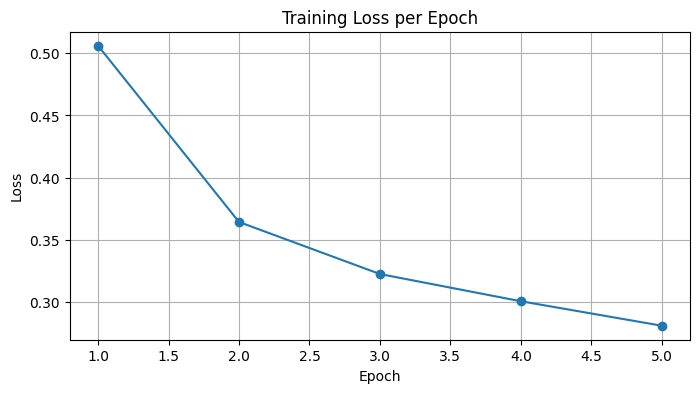

In [3]:
# 손실 그래프
plt.figure(figsize=(8,4))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
